# Statistics, linear regression & clustering

In this notebook we'll cover statistics. Statistics are in itself an important subject, but it is also very widely used in Machine Learning. We will start with the basics and then progress to more advanced concepts

## Contents
0. Install packages
1. Some basic statistics with Statistics module
2. Linear regression with Scipy
3. Logistic regression
4. Clustering

## 1. Some basic statistics with Statistics module

In notebook 3.00 Basics of Data Analysis we have already covered the mean, median and mode of a set of data. We also covered using Numpy to calculate standard deviation, variance and percentile.

Docs: https://docs.python.org/3/library/statistics.html
Source: https://www.python-engineer.com/posts/statistics-python/


In [1]:
import statistics

In [13]:
#first example
import random
import statistics as st

numbers = [random.randint(1, 100) for _ in range(10)]

print("Generated random list:", numbers)

print("Mean:", st.mean(numbers)) #this is the mean
print("Fast Mean:", st.fmean(numbers)) #the fast mean (a waster way, always returns a float)
print("Geometric Mean:", st.geometric_mean(numbers))
print("Harmonic Mean:", st.harmonic_mean(numbers))

Generated random list: [68, 99, 27, 44, 15, 76, 60, 27, 50, 70]
Mean: 53.6
Fast Mean: 53.6
Geometric Mean: 46.918578507280664
Harmonic Mean: 39.62197755098597


In [5]:
#print some other stuff: median and quantiles

print("Median:", st.median(numbers))
print("Quantiles:", st.quantiles(numbers))
print('Mode:', st.mode(numbers))
print("Sample variance:", st.variance(numbers))
print("Sample standard deviation:", st.stdev(numbers))

Median: 60.0
Quantiles: [35.5, 60.0, 87.0]
Mode: 85
Sample variance: 961.8333333333334
Sample standard deviation: 31.013437947659614


## 2. Linear regression with Scipy

source: Intro to Python Deitel & Deitel p. 620 ev 

In [12]:
#download the data
import wget
wget.download('https://raw.githubusercontent.com/pdeitel/IntroToPython/master/examples/ch10/ave_hi_nyc_jan_1895-2018.csv')

100% [............................................................] 2191 / 2191

'ave_hi_nyc_jan_1895-2018 (1).csv'

In [23]:
import glob
my_csvs =glob.glob('*.csv')
my_csvs

['foo.csv',
 'Snoring-data-2021-12-12 09_38_24.csv',
 'Snoring-data-2021-12-03 09_15_24.csv',
 'Snoring-data-2021-12-06 19_03_36.csv',
 'sleep_df_oura_202112011-12.csv',
 'Snoring-data-2021-12-04 11_41_48.csv',
 'OEtest_210506_youtubetraffic.csv',
 'OEtest_210505_youtube_traffic.csv',
 'snoring_2021_12_3-4b.csv',
 'Snoring-data-2021-12-04 11_51_51.csv',
 'ave_hi_nyc_jan_1895-2018.csv',
 'UMTMVS.csv',
 'Snoring-data-2021-12-10 13_27_41.csv',
 '2021-12-5_Features_.csv']

In [11]:
#create a pandas table
import pandas as pd
nyc = pd.read_csv("ave_hi_nyc_jan_1895-2018.csv")
nyc.columns =['Date', 'Temperature', 'Anomaly']
nyc.Date = nyc.Date.floordiv(100)
nyc.head(10) 

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0
5,1900,37.4,0.0
6,1901,37.0,-0.4
7,1902,35.0,-2.4
8,1903,35.5,-1.9
9,1904,29.8,-7.6


In [26]:
#next, we'll start our analysis
from scipy import stats
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

In [27]:
#printing the slope and intercept op the data
print(linear_regression.slope)
print(linear_regression.intercept)

0.014771361132966163
8.694993233674289


<Axes: xlabel='Date', ylabel='Temperature'>

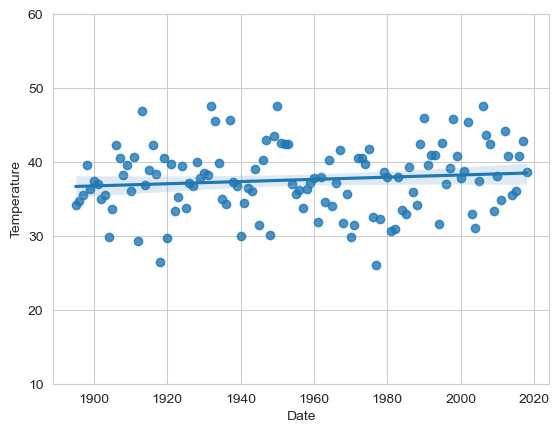

In [28]:
#create a graph
import seaborn as sns
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)
axes.set_ylim(10,60)
axes

## 3. Logistic regression

### Sources
- https://realpython.com/logistic-regression-python/

In [6]:
#import packages
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
#create some data
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [8]:
#create a model
model = LogisticRegression(solver='liblinear', random_state=0)

In [10]:
#fit the model
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

## 4. Clustering with KMeans

Clustering is a type of unsupervised learning. 

Clustering is a set of techniques used to partition data into groups, or clusters. Clusters are loosely defined as groups of data objects that are more similar to other objects in their cluster than they are to data objects in other clusters. 

Clustering is a great tool for data analysis problems such as customer segmentation, recommender systems search and many more.

Anomaly detection is about detecting the outliers of a cluster, so this is also a possibility


In machine learning a *model* implements a machine learning algorithm, but in scikit-learn (=sklearn) models are called *estimators*. 

In ML there are two types of parameters:
 - **parameters** are learned from the data you provide
 - **hyperparameters** are specified in advance (by you).
 
Sklearn comes with predifined hyperparameters.

### Sources:
- https://realpython.com/k-means-clustering-python/#what-is-clustering

https://www.datacamp.com/tutorial/k-means-clustering-python


Download the dataset from kaggle with the command below, but make sure you have a kaggle account AND have the kaggle api installed. You can install the API here: https://www.kaggle.com/docs/api

If you prefer downloading the dataset yourself go to: https://www.kaggle.com/datasets/camnugent/california-housing-prices?resource=download

In [65]:
pip show scikit-learn

Name: scikit-learn
Version: 1.3.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /Users/michielbontenbal/anaconda3/lib/python3.10/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: fastai, imbalanced-learn, librosa, sentence-transformers
Note: you may need to restart the kernel to use updated packages.


In [37]:
!kaggle datasets download -d camnugent/california-housing-prices

100%|████████████████████████████████████████| 400k/400k [00:00<00:00, 1.04MB/s]
100%|████████████████████████████████████████| 400k/400k [00:00<00:00, 1.04MB/s]


In [15]:
# With this script we will unzip the file
from zipfile import ZipFile
  
# specifying the zip file name
file_name = "california-housing-prices.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

File Name                                             Modified             Size
housing.csv                                    2019-09-22 01:36:12      1423529
Extracting all the files now...
Done!


In [16]:
#create a pandas table
import pandas as pd

home_data = pd.read_csv('housing.csv', usecols = ['longitude', 'latitude', 'median_house_value'])
home_data.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


<Axes: xlabel='longitude', ylabel='latitude'>

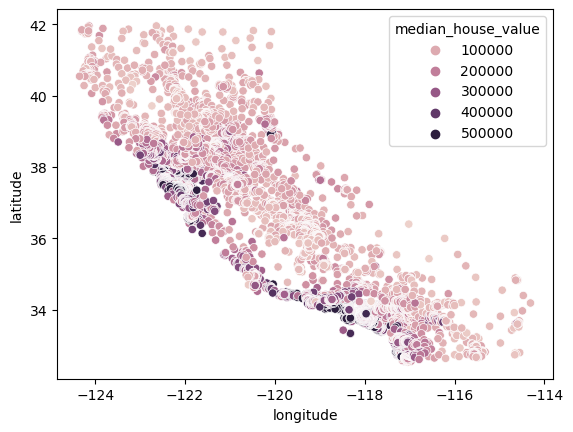

In [17]:
#let's make a nice plot using seaborn
import seaborn as sns

sns.scatterplot(data = home_data, x = 'longitude', y = 'latitude', hue = 'median_house_value')

In [18]:
#create a model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(home_data[['latitude', 'longitude']], home_data[['median_house_value']], test_size=0.33, random_state=0)

In [19]:
# normalize with preprocessing
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [20]:
#Do the KMeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto') #set hyperparameters
kmeans.fit(X_train_norm) 

KMeans(n_clusters=3, n_init='auto', random_state=0)

<Axes: xlabel='longitude', ylabel='latitude'>

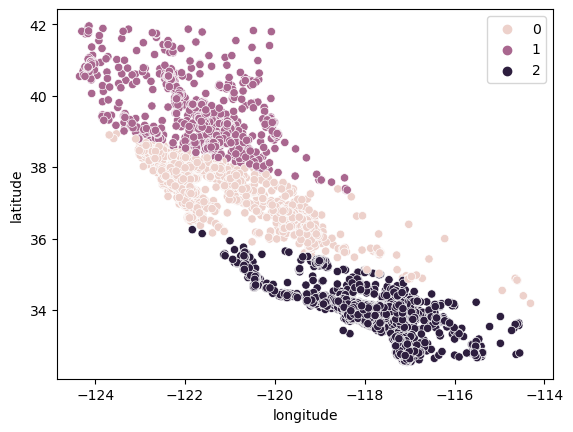

In [21]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)

<Axes: ylabel='median_house_value'>

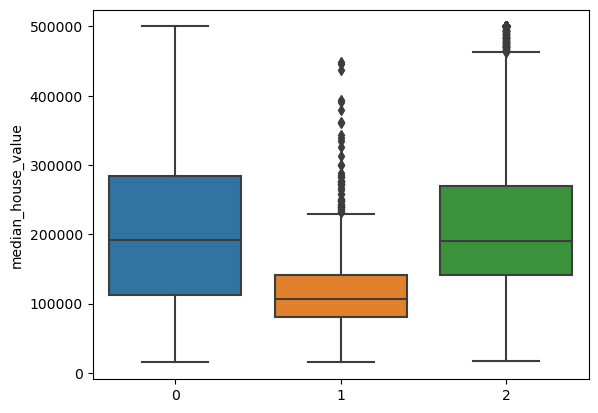

In [22]:
sns.boxplot(x = kmeans.labels_, y = y_train['median_house_value'])

In [23]:
#getting the silhouette score
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

0.7499371920703546

### 4b. Clustering with the MNIST digits dataset (in progress)

In [24]:
from sklearn.datasets import load_digits

digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [25]:
#values of every 100th sample
digits.target[::100]

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

In [26]:
#print the shape of the data
digits.data.shape

(1797, 64)

In [27]:
#print values of sample
digits.images[13]

array([[ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.],
       [ 0.,  4., 13.,  8.,  9., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  6., 14., 15.,  3.,  0.],
       [ 0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.],
       [ 0.,  1.,  5.,  6., 13., 16.,  6.,  0.],
       [ 0.,  2., 12., 12., 13., 11.,  0.,  0.]])

In [28]:
import matplotlib.pyplot as plt
figure, axes = plt.subplots(nrows=4, ncols=6, figsize = (6,4))
for item in zip(axes.ravel(), digits)

SyntaxError: expected ':' (2112176017.py, line 3)

<function matplotlib.pyplot.show(close=None, block=None)>

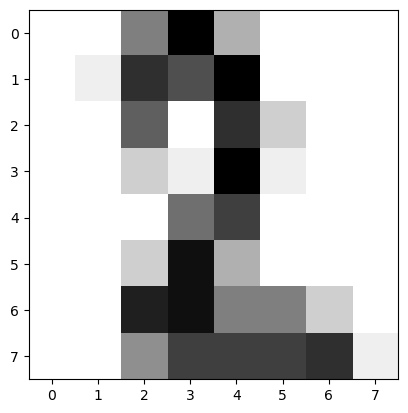

In [29]:
# showing a sample "2" of the dataset 
import matplotlib.pyplot as plt
axes = plt.subplot()
image = plt.imshow(digits.images[22], cmap=plt.cm.gray_r)
plt.show

In [ ]:
from sklearn.model_selection import train_test_split


### 4c. Do KMeans on a set of data

/Users/michielbontenbal/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


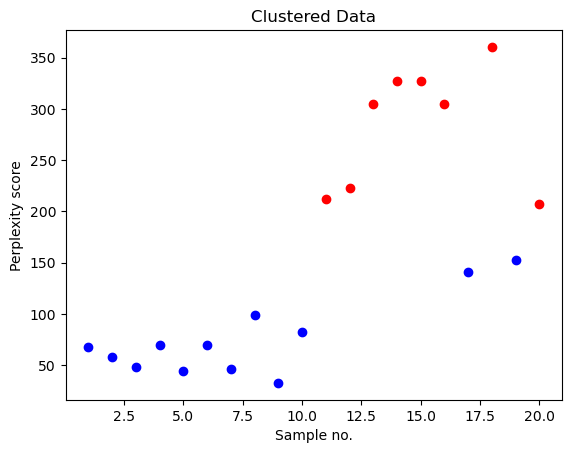

In [33]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Sample data
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
results = [67.5429, 58.108, 48.4369, 69.6907, 44.2813, 69.5256, 46.7678, 99.2462, 32.8285, 82.521, 211.6711, 222.4663, 304.6771, 326.6619, 327.4499, 305.0379, 141.3531, 360.3304, 153.0569, 207.1511]

# Combine x and y into a single array
data = np.column_stack((x, y))

# Perform clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
labels = kmeans.labels_

# Define colors for different clusters
colors = ['red', 'blue']

# Create scatter plot with colored clusters
for i in range(len(x)):
    plt.scatter(x[i], y[i], color=colors[labels[i]])

# Set labels and title
plt.xlabel('Sample no.')
plt.ylabel('Perplexity score')
plt.title('Clustered Data')

# Show the plot
plt.show()

In [34]:
#print the KMeans
kmeans

KMeans(n_clusters=2)